This notebook contains some RCT examples for teaching.


# Polio RCT

One of the earliest randomized experiments were the Polio vaccination trials conducted by the Public Health Service in 1954.  The question was whether Salk vaccine prevented polio.  Children in the study were randomly assigned either a treatment (polio vaccine shot) or a placebo (saline solution shot), without knowing which one they received. The doctors in the study, making the diagnosis, did not know whether a child received a vaccine or not. In other words, the trial was a double-blind, randomized control trial.  The trial had to be large, because the rate at which Polio occured in the population was 50 per 100,000.  The treatment group saw 33 polio cases per 200,745; the control group saw 115 cases per 201,229. The estimated avearage treatment effect is about
$$
-40.7
$$
per 100,000 with the 95% confidence band (based on approximate normality of the two sample means and their differences):
$$[-52, -28].$$
As this is an RCT, the confidence band suggests that the Polio vaccine **caused** the reduction in the risk of polio.

The interesting thing here is that we don't need the underlying individual data to evaluate the effectivess of the vaccine. This is because the outcomes are Bernoulli random variables, and we have enough information to compute the estimate of ATE as well as the confidence intervals from the group case counts.

We also compute the Vaccine Efficacy metric, which refers to the following measure according to the [CDC](https://www.cdc.gov/csels/dsepd/ss1978/lesson3/section6.html):
$$
VE = \frac{\text{Risk for Unvaccinated - Risk for Vaccinated}}{\text{Risk for Unvaccinated}}.
$$
It describes the relative reduction in risk caused by vaccination.


It is staightforward to get the VE estimate by just plugging-in the numbers, but how do we get the approximate variance estimate? I am too lazy to do calculations for the delta method, so I will just use a simulation (a form of approximate bootstrap) to obtain the confidence intervals.



[1] "Incidence per 100000 among treated: 16.4388"
[1] "Incidence per 100000 among controlled: 57.1488"
[1] "Estimated ATE of occurances per 100,000 is -40.7101"
[1] "Standard deviation for ATE is 6.0474"
[1] "95% confidence interval of ATE is [ -52.563 , -28.8571 ]"
[1] "Overall VE is 0.7124"
[1] "95% confidence interval of VE is [ 0.5903 , 0.8176 ]"


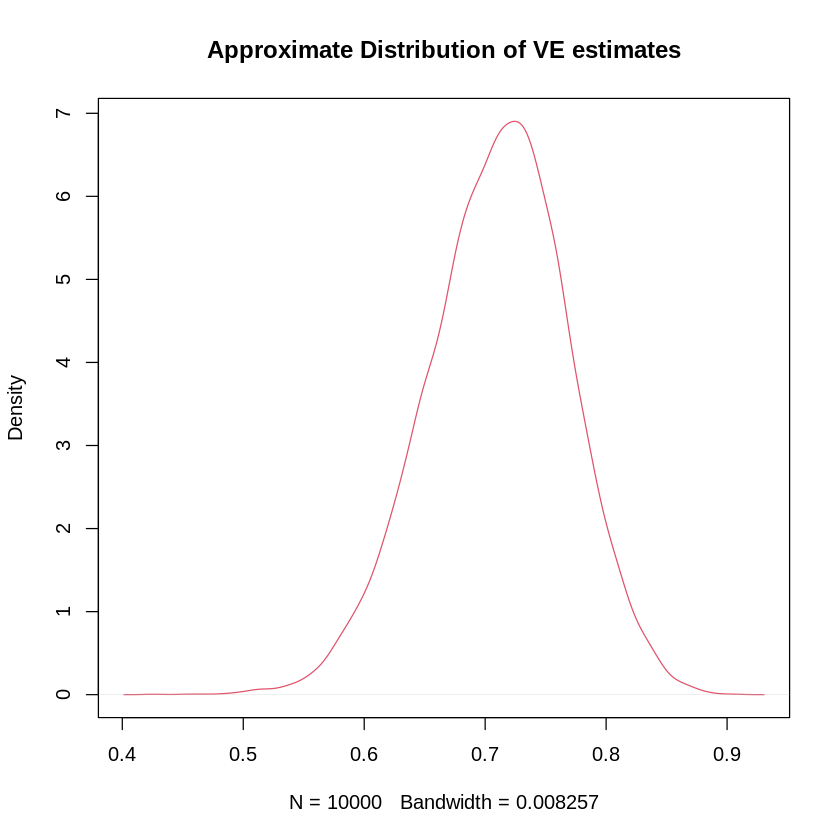

In [ ]:
NV = 200745 # number of vaccinated (treated)
NU = 201229 # number of unvaccinated (control)
ATE = 33*100000/NV-115*100000/NU   # average treatment effect
RV= 33/NV  # average outcome for vaccinated
RU =115/NU  # average outcome for unvaccinated
VE = (RU - RV)/RU; # vaccine efficacy


# incidence per 100000
Incidence.RV=RV*100000
Incidence.RU=RU*100000

print(paste("Incidence per 100000 among treated:", round(Incidence.RV,4)))

print(paste("Incidence per 100000 among controlled:", round(Incidence.RU,4)))

# treatment effect - estimated reduction in incidence per 100000 people
delta.hat = 100000*(RV-RU)

print(paste("Estimated ATE of occurances per 100,000 is",  round(delta.hat,4)))

# variance, standard deviation and confidence interval of ATE using that outcomes are Bernoulli
Var.RV = RV*(1-RV)/NV
Var.RU = RU*(1-RU)/NU
Var.delta.hat =  100000^2*(Var.RV + Var.RU)
Std.delta.hat = sqrt(Var.delta.hat)

print(paste("Standard deviation for ATE is", round(Std.delta.hat,4)))

CI.delta = c(delta.hat -1.96*sqrt(Var.delta.hat),
             delta.hat +1.96*sqrt(Var.delta.hat))

print(paste("95% confidence interval of ATE is [", round(CI.delta[1],4), ",",
            round(CI.delta[2],4), "]"   ))

print(paste("Overall VE is", round(VE,4) ))

# we use an approximate bootstrap to find the confidence interval of vaccine efficacy
# via Monte Carlo draws
set.seed(1)
B = 10000 # number of bootstraps
RVs = RV  + rnorm(B)*sqrt(Var.RV)
RUs = RU  + rnorm(B)*sqrt(Var.RU)
VEs= (RUs - RVs)/RUs

plot(density(VEs), col=2, main="Approximate Distribution of VE estimates")

CI.VE =  quantile(VEs, c(.025, .975)) # use the empirical quantiles from the bootstraps

print(paste("95% confidence interval of VE is [", round(CI.VE[1],4), ",",
            round(CI.VE[2],4), "]"))

# Pfizer/BNTX Covid-19 RCT

Here is a link to the FDA [briefing](https://www.fda.gov/media/144245/download) and an interesting [discussion](
https://garycornell.com/2020/12/09/statistics-in-the-pfizer-data-how-good-is-the-vaccine/?fbclid=IwAR282lS0Vl3tWmicQDDhIJAQCMO8NIsCXyWbUWwTtPuKcnuJ2v0VWXRDQac), as well as data.

Pfizer/BNTX was the first vaccine approved for emergency use to reduce the risk of Covid-19 decease. In studies to assess vaccine efficacy, volunteers were randomly assigned to receive either a treatment (2-dose vaccination) or a placebo, without knowing which they recieved. The doctors making the diagnoses did not know now whether a given volunteer received a vaccination or not. The results of the study are given in the following table.

![](https://lh6.googleusercontent.com/oiO6gYom1UZyrOhgpFx2iq8ike979u3805JHiVygP-Efh1Yaz2ttyPcgWKlT1AqHDM4v46th3EPIkOvRLyXA0fNUloPL-mL9eOFmSAzfbNOHyCZSQ0DyzMhcFUtQuZ520R5Qd2lj):

Here we see both the overall effects and the effects by age group. The confidence intervals for the overall ATE are tight and suggest high effectiveness of the vaccine.

**Exercise 1:** Use the same approach as that for the Polio example to estimate ATE (with corresponding confidence interval) and the VE (with corresponding confience interval) for the Pfizer/BNTX vaccine.


Note: This gives slightly different results than the FDA result, because the FDA used inversion of exact binomial tests to construct confidence intervals. We use asymptotic approches based on approximate normality, which is more crude, but delivers a rather similar result. The difference in results occurs when the binomial counts are too low for central limit theorems to work successfully.

